In [58]:
#import libraries
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.tokenize  import sent_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.show()
plt.tight_layout()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<Figure size 640x480 with 0 Axes>

In [59]:
#load data
df= pd.read_table('https://raw.githubusercontent.com/aishwaryamate/Datasets/acd3eb6b1d1e3a89fbe740695dd13a1a8d2662e3/apple.txt')
df.head()

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,I have been a Macbook pro user for last 2 year...


In [60]:
#load affin lexicon
afinn = pd.read_csv('https://raw.githubusercontent.com/snehal-excelr/DS_Python/main/Afinn.csv',encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [61]:
#Text cleaning
df

,x
0,It's amazing..... battery last around 10 -12 h...
1,Finally a MacBook possession. Got it in 50k in...
2,Best Laptop under 60k. If you don't want any a...
3,Pros:1. Light weight and super fast response t...
4,I have been a Macbook pro user for last 2 year...
5,""""
6,I am very upset about the product as I checked...
7,Reason for 1 star is I ot an defective piece. ...
8,Got the Apple Macbook air on amazon discount s...
9,White line coming on screen in just three mont...


In [62]:
txt = '  '.join(df['x'])
txt

'It\'s amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n              Finally a MacBook possession. Got it in 50k in Diwali sale. Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better. Terrific sense of possession & pride.Bad News. Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !!), all printers are not compatible (e.g. the most economical MFD laser printer RICOH SP 111 can\'t be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you mas

In [63]:
sent = sent_tokenize(txt)
sent

["It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders\n              Finally a MacBook possession.",
 'Got it in 50k in Diwali sale.',
 'Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.',
 'Terrific sense of possession & pride.Bad News.',
 'Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !',
 '!',
 '), all printers are not compatible (e.g.',
 "the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynot

In [64]:
#Converting sentences into dataframe
sent = pd.DataFrame(sent,columns= ['Sentences'])
sent

,Sentences
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
210,You can get one of the best movie experiences ...
211,Overall I would it a 4.5/5.
212,"I got a great deal on this laptop, which I hav..."
213,I got it not only on discount but also was abl...


In [65]:
#Afinn score
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [66]:
score = afinn.set_index('word')['value'].to_dict()
score

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [67]:
#Sentiment calculation function
nlp = spacy.load('en_core_web_sm')
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [68]:
def calculate_sentiment(text):
  sent_score=0
  print(text)
  if text:
    sentence = nlp(text)
    for word in sentence:
      sent_score=sent_score+score.get(word.lemma_,0)
  return sent_score

In [69]:
#test function
calculate_sentiment('awesome')

awesome


4

In [70]:
calculate_sentiment('wow! Dhoni is awesome')

wow! Dhoni is awesome


8

In [71]:
calculate_sentiment('worst product! Do not purchase')

worst product! Do not purchase


-3

In [72]:
#getting emotion score
sent

,Sentences
0,It's amazing..... battery last around 10 -12 h...
1,Got it in 50k in Diwali sale.
2,Technically good laptop.Good News.luxury produ...
3,Terrific sense of possession & pride.Bad News.
4,Problems will be there if you are switching fr...
...,...
210,You can get one of the best movie experiences ...
211,Overall I would it a 4.5/5.
212,"I got a great deal on this laptop, which I hav..."
213,I got it not only on discount but also was abl...


In [73]:
sent['Emotion']= sent['Sentences'].apply(calculate_sentiment)
sent

It's amazing..... battery last around 10 -12 hrs.....best laptop for students and coders
              Finally a MacBook possession.
Got it in 50k in Diwali sale.
Technically good laptop.Good News.luxury product, niche technology, good battery life, reliable machine (other laptops crash and become defunct in 6-10 years), no anti-virus required, security of data and transactions much better.
Terrific sense of possession & pride.Bad News.
Problems will be there if you are switching from windows based system - very less space in hard disk, no CD drive, inability to transfer data from Mac to your existing external hard disc unless you format it, apps are mostly paid and re unreasonably expensive (no free apps which are available otherwise on google play store, even the angry bird costs Rs 400 !
!
), all printers are not compatible (e.g.
the most economical MFD laser printer RICOH SP 111 can't be used), huge compatibility issues with Pages (MS Word) and Keynote (powerpoint) unless you maste

,Sentences,Emotion
0,It's amazing..... battery last around 10 -12 h...,7
1,Got it in 50k in Diwali sale.,0
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
4,Problems will be there if you are switching fr...,-11
...,...,...
210,You can get one of the best movie experiences ...,3
211,Overall I would it a 4.5/5.,0
212,"I got a great deal on this laptop, which I hav...",3
213,I got it not only on discount but also was abl...,0


In [74]:
sent[sent['Emotion']>0]

,Sentences,Emotion
0,It's amazing..... battery last around 10 -12 h...,7
2,Technically good laptop.Good News.luxury produ...,5
3,Terrific sense of possession & pride.Bad News.,4
7,the most economical MFD laser printer RICOH SP...,1
9,Mac con not be connected to most of the projec...,1
...,...,...
207,great product\n The elegant work ...,5
209,"Coming to the performance, the speed of this i...",2
210,You can get one of the best movie experiences ...,3
212,"I got a great deal on this laptop, which I hav...",3


In [75]:
sent[sent['Emotion']< 0]

,Sentences,Emotion
4,Problems will be there if you are switching fr...,-11
11,"Marketing strategy for Indian market, if at al...",-3
13,"Presently, it doesn't seem to be happening.Ove...",-2
14,"Else, think hard.",-1
28,Limited softwares available3.,-1
34,- PRO advantagesI know a lot of people might b...,-2
49,"PRO offers 8-9 hours only, while Air offers, 1...",-1
53,But if you are once in a while user of intensi...,-1
54,If you have any queries leave a comment below.,-1
58,I took it to the service centre and they infor...,-2


In [76]:
sent[sent['Emotion']== 0]

,Sentences,Emotion
1,Got it in 50k in Diwali sale.,0
5,!,0
6,"), all printers are not compatible (e.g.",0
8,you need to spend extra for an external CD wri...,0
12,If these critical issues (and a few more not m...,0
...,...,...
199,So i have to use a repaired device inspite of ...,0
204,The service center guy told me it would cost a...,0
208,"The design, the user friendliness, the compact...",0
211,Overall I would it a 4.5/5.,0


In [77]:
sent.describe()

,Emotion
count,215.000000
mean,1.013953
std,3.466096
min,-11.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,24.000000


In [78]:
sent['Length'] = sent['Sentences'].apply(len)
sent

,Sentences,Emotion,Length
0,It's amazing..... battery last around 10 -12 h...,7,132
1,Got it in 50k in Diwali sale.,0,29
2,Technically good laptop.Good News.luxury produ...,5,230
3,Terrific sense of possession & pride.Bad News.,4,46
4,Problems will be there if you are switching fr...,-11,360
...,...,...,...
210,You can get one of the best movie experiences ...,3,55
211,Overall I would it a 4.5/5.,0,27
212,"I got a great deal on this laptop, which I hav...",3,81
213,I got it not only on discount but also was abl...,0,84


<Axes: xlabel='Emotion', ylabel='Length'>

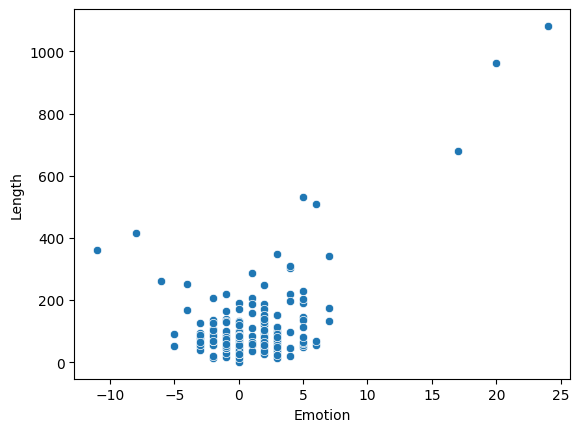

In [79]:
sns.scatterplot(x= sent['Emotion'],y= sent['Length'])